# 선형회귀 개요

선형 회귀(線型回歸, Linear regression)는 종속 변수 y와 한 개 이상의 독립 변수X와의 선형 상관 관계를 모델링하는 회귀분석 기법. [위키백과](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80)

## 선형회귀 모델
- 입력 Feature에 가중치(Weight)를 곱하고 편향(bias)를 더해 예측 결과를 출력한다.
- Weight와 bias가 학습대상 Parameter가 된다.

$$
\hat{y_i} = w_1 x_{i1} + w_2 x_{i2}... + w_{p} x_{ip} + b
\\
\hat{y_i} = \mathbf{w}^{T} \cdot \mathbf{X} 
$$

- $\hat{y_i}$: 예측값
- $x$: 특성(feature-컬럼)
- $w$: 가중치(weight), 회귀계수(regression coefficient). 특성이 $\hat{y_i}$ 에 얼마나 영향을 주는지 정도
- $b$: 절편
- $p$: p 번째 특성(feature)/p번째 가중치
- $i$: i번째 관측치(sample)

### Boston DataSet
보스톤의 지역별 집값 데이터셋

 - CRIM	: 지역별 범죄 발생률
 - ZN	: 25,000 평방피트를 초과하는 거주지역의 비율
 - INDUS: 비상업지역 토지의 비율
 - CHAS	: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
 - NOX	: 일산화질소 농도
 - RM	: 주택 1가구당 평균 방의 개수
 - AGE	: 1940년 이전에 건축된 소유주택의 비율
 - DIS	: 5개의 보스턴 고용센터까지의 접근성 지수
 - RAD	: 고속도로까지의 접근성 지수
 - TAX	: 10,000 달러 당 재산세율
 - PTRATIO : 지역별 교사 한명당 학생 비율
 - B	: 지역의 흑인 거주 비율
 - LSTAT: 하위계층의 비율(%)
 
 - MEDV	: Target.  지역의 주택가격 중앙값 (단위: $1,000)


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
X, y = boston.data, boston.target

X.shape, y.shape

((506, 13), (506,))

In [7]:
df = pd.DataFrame(X, columns=boston.feature_names)
df['MEDV'] = y

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
df.CHAS.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [9]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## LinearRegression
- 가장 기본적인 선형 회귀 모델

### 데이터 전처리

- **선형회귀 모델사용시 전처리**
    - **범주형 Feature**
        - : 원핫 인코딩
    - **연속형 Feature**
        - Feature Scaling을 통해서 각 컬럼들의 값의 단위를 맞춰준다.
        - StandardScaler를 사용할 때 성능이 더 잘나오는 경향이 있다.

#####  CHAS Feature 원핫인코딩

In [10]:
df2 = pd.get_dummies(df, columns=['CHAS'])

##### X, y 분리, train/test set 나누기

In [11]:
y = df2['MEDV']
X = df2.drop(columns='MEDV')
X.shape, y.shape

((506, 14), (506,))

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # 회귀: stratify를 설정하지 않는다.
X_train.shape, X_test.shape

((379, 14), (127, 14))

##### Feature scaling

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CHAS_0.0', 'CHAS_1.0'],
      dtype='object')

##### 평가지표 함수

In [18]:

from metrics import print_regression_metrics

SyntaxError: invalid syntax (metrics.py, line 1)

In [19]:

from sklearn.metrics import mean_squared_error, r2_score

def print_regression_metrics(y, pred, title=None):
    mse = mean_squared_error(y, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, pred)
    if title:
        print(title)
    print(f"MSE: {mse}, RMSE: {rmse}, R2: {r2}")
    print("-"*100)

##### 모델 생성, 학습, 추론, 평가

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [21]:
# bias
lr.intercept_

22.608707124010557

In [22]:
# 각 feature 에 곱해주는 가중치(weight, coefficient)
lr.coef_

array([-0.97100092,  1.04667838, -0.04044753, -1.80876877,  2.60991991,
       -0.19823317, -3.00216551,  2.08021582, -1.93289037, -2.15743759,
        0.75199122, -3.59027047, -0.29704388,  0.29704388])

In [27]:
pd.Series(lr.coef_,index=X.columns)

CRIM       -0.971001
ZN          1.046678
INDUS      -0.040448
NOX        -1.808769
RM          2.609920
AGE        -0.198233
DIS        -3.002166
RAD         2.080216
TAX        -1.932890
PTRATIO    -2.157438
B           0.751991
LSTAT      -3.590270
CHAS_0.0   -0.297044
CHAS_1.0    0.297044
dtype: float64

In [28]:
y_pred = lr.coef_ @ X_train.T + 22.608707124010557

### Coeficient의 부호
- weight가 
- 양수: Feature가 1 증가할때 y(집값)도 weight만큼 증가한다.
- 음수: Feature가 1 증가할때 y(집값)도 weight만큼 감소한다.
- 절대값 기준으로 0에 가까울 수록 집값에 영향을 주지 않고 크면 클수록(0에서 멀어질 수록) 집값에 영향을 많이 주는 Feature 란 의미가 된다.

In [29]:
pd.Series(lr.coef_, index=X_train.columns)

CRIM       -0.971001
ZN          1.046678
INDUS      -0.040448
NOX        -1.808769
RM          2.609920
AGE        -0.198233
DIS        -3.002166
RAD         2.080216
TAX        -1.932890
PTRATIO    -2.157438
B           0.751991
LSTAT      -3.590270
CHAS_0.0   -0.297044
CHAS_1.0    0.297044
dtype: float64

##### 평가

In [30]:
pred_train = lr.predict(X_train_scaled)
pred_test = lr.predict(X_test_scaled)

print_regression_metrics(y_train, pred_train, title='LinearRegressor: Train')
print_regression_metrics(y_test, pred_test, title="LinearRegressor: Test")

LinearRegressor: Train
MSE: 19.640519427908046, RMSE: 4.4317625644779355, R2: 0.7697699488741149
----------------------------------------------------------------------------------------------------
LinearRegressor: Test
MSE: 29.7822450923024, RMSE: 5.457311159564058, R2: 0.6354638433202124
----------------------------------------------------------------------------------------------------


In [32]:
print('정답:', y_test[:5].values)
print('예측:', pred_test[:5])

정답: [22.6 50.  23.   8.3 21.2]
예측: [24.95233283 23.61699724 29.20588553 11.96070515 21.33362042]


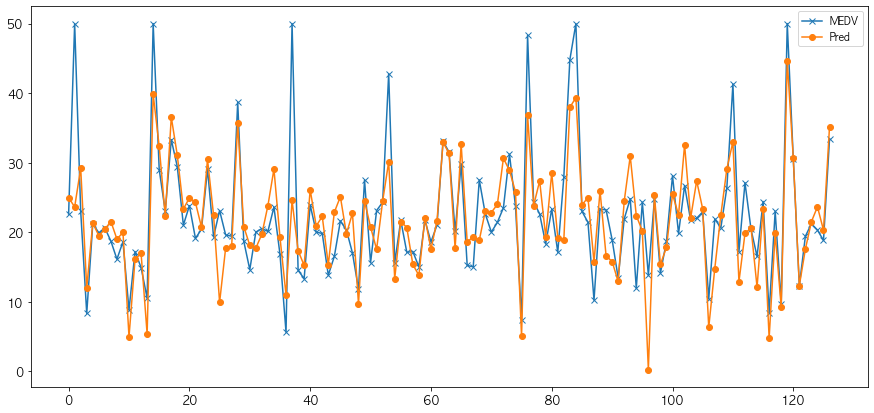

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.plot(range(len(y_test)), y_test, label='MEDV', marker='x')
plt.plot(range(len(y_test)), pred_test, label='Pred', marker='o')
plt.legend()
plt.show()

# 다항회귀 (Polynomial Regression)
- 단순한 직선형 보다 복잡한 비선형의 데이터셋을 학습하기 위한 방식.
    - Feature가 너무 적어 y의 값들을 다 표현 하지 못하여 underfitting이 된 경우 Feature를 늘려준다.
- 각 Feature들을 거듭제곱한 것과 Feature들 끼리 곱한 새로운 특성들을 추가한 뒤 선형모델로 훈련시킨다.
    - 파라미터 가중치를 기준으로는 일차식이 되어 선형모델이다. 파라미터(Coef, weight)들을 기준으로는 N차식이 되어 비선형 데이터를 추론할 수 있는 모델이 된다.
- `PolynomialFeatures` Transformer를 사용해서 변환한다.

## 예제

##### 데이터셋 만들기

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = X**2 + X + 2 + np.random.normal(0,1, size=(m,1))
y = y.flatten()
print(X.shape, y.shape)

(100, 1) (100,)


In [34]:
df = pd.DataFrame({"X":X.flatten(), "Y":y})
df.head()

,X,Y
0,0.292881,1.213510
1,1.291136,5.858995
2,0.616580,3.462414
3,0.269299,0.805577
4,-0.458071,3.240010


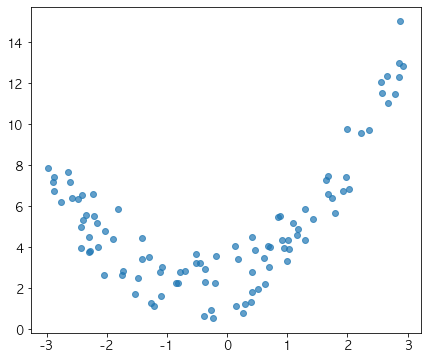

In [35]:
plt.figure(figsize=(7,6))
plt.scatter(X, y, alpha=0.7)
plt.show()

##### 모델생성, 학습

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
lr = LinearRegression()
lr.fit(X, y)
print(lr.coef_, lr.intercept_)

[0.78189543] 5.175619278567209


In [38]:
pred = lr.predict(X)
print_regression_metrics(y, pred)

MSE: 7.729204760808937, RMSE: 2.7801447373848966, R2: 0.19138252437306003
----------------------------------------------------------------------------------------------------


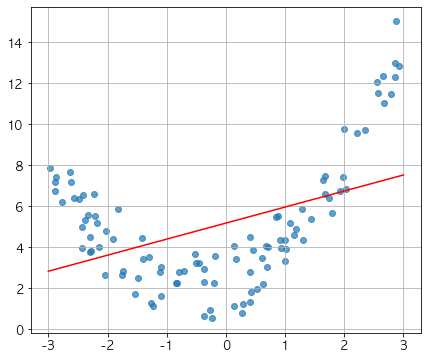

In [39]:
# 모델의 예측을 시각화
X_new = np.linspace(-3,3,100).reshape(-1, 1)
pred_new = lr.predict(X_new) # -3~3 사이의 값들로 모델이 예측한 값들

plt.figure(figsize=(7,6))

plt.scatter(X, y, alpha=0.7) # 실제 데이터셋을 이용해서 scatter plot
plt.plot(X_new, pred_new, color='red') #-3 ~ 3 값을 이용해 예측한 값으로 line plot

plt.grid(True)
plt.show()

##### PolynomialFeatures를 이용해 다항회귀구현
- PolynomialFeautres: Transformer(변환기)
    - 기존 Feature에 N제곱한 Feature들을 생성해주는 변환기

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
poly_f = PolynomialFeatures(degree=2, #생성할 Feature의 최고차항 차수를 지정. (2: X+X**2, 3:X+X**2, X**3)
                            include_bias=False)
X_poly = poly_f.fit_transform(X)

In [42]:
X.shape, X_poly.shape

((100, 1), (100, 2))

In [43]:
X[:5]

array([[ 0.29288102],
       [ 1.2911362 ],
       [ 0.61658026],
       [ 0.2692991 ],
       [-0.4580712 ]])

In [44]:
X_poly[:5]

array([[ 0.29288102,  0.08577929],
       [ 1.2911362 ,  1.66703268],
       [ 0.61658026,  0.38017121],
       [ 0.2692991 ,  0.072522  ],
       [-0.4580712 ,  0.20982923]])

In [45]:
poly_f.get_feature_names_out()

array(['x0', 'x0^2'], dtype=object)

##### LinearRegression 모델을 이용해 평가

In [46]:
lr2 = LinearRegression()
lr2.fit(X_poly, y)

LinearRegression()

In [47]:
print(lr2.coef_, lr2.intercept_)

[0.97906552 0.94978823] 2.3405007562628866


In [48]:
pred2 = lr2.predict(X_poly)
print_regression_metrics(y, pred2, title="다항회귀")
print_regression_metrics(y, pred, title="변환없이")

다항회귀
MSE: 0.9735576723414217, RMSE: 0.9866902616026073, R2: 0.8981478985551461
----------------------------------------------------------------------------------------------------
변환없이
MSE: 7.729204760808937, RMSE: 2.7801447373848966, R2: 0.19138252437306003
----------------------------------------------------------------------------------------------------


##### 시각화

In [49]:
X_new = np.linspace(-3,3,100).reshape(-1, 1)
X_new_poly = poly_f.transform(X_new)
pred_new2 = lr2.predict(X_new_poly)

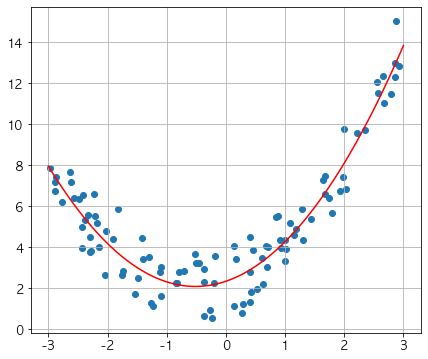

In [50]:
plt.figure(figsize=(7,6))

plt.scatter(X, y)
plt.plot(X_new, pred_new2, color='red')
plt.grid(True)
plt.show()

## degree를 크게
- Feature가 너무 많으면 Overfitting 문제가 생긴다.

In [ ]:
pnf = PolynomialFeatures(degree=25, include_bias=False)
X_train_poly_100 = pnf.fit_transform(X)
X_train_poly_100.shape, X.shape

In [ ]:
lr = LinearRegression()
lr.fit(X_train_poly_100, y)

In [ ]:
lr.coef_.shape

In [ ]:
X_new = np.linspace(-3,3,100).reshape(-1, 1)
X_new_poly_100 = pnf.transform(X_new)
pred_new_100 = lr.predict(X_new_poly_100)

In [ ]:
plt.figure(figsize=(7,6))
plt.scatter(X, y)
plt.plot(X_new, pred_new_100, color='r', alpha=0.5)
plt.show()

### PolynomialFeatures 예제

In [ ]:
data = np.arange(12).reshape(4,3) #Feature: 3
print(data.shape)
data

In [ ]:
pnf2 = PolynomialFeatures(degree=2) #include_bias=False)
data_poly = pnf2.fit_transform(data)
data_poly.shape

In [ ]:
pnf2.get_feature_names_out()

In [ ]:
pd.DataFrame(data_poly, columns=pnf2.get_feature_names_out())

In [ ]:
pnf3 = PolynomialFeatures(degree=5)
data_poly2 = pnf3.fit_transform(data)
data_poly2.shape

In [ ]:
pnf3.get_feature_names_out()

### 다항회귀를 Boston Dataset에 적용

In [ ]:
pnf = PolynomialFeatures(degree=2, include_bias=False)
X_train_scaled_poly = pnf.fit_transform(X_train_scaled)
X_test_scaled_poly = pnf.transform(X_test_scaled)

In [ ]:
X_train_scaled.shape, X_train_scaled_poly.shape

In [ ]:
pnf.get_feature_names_out()

##### 모델 생성 학습 추론 평가

In [ ]:
lr3 = LinearRegression()
lr3.fit(X_train_scaled_poly, y_train)

In [ ]:
pred_train3 = lr3.predict(X_train_scaled_poly)
pred_test3 = lr3.predict(X_test_scaled_poly)

In [ ]:
print('PolynomialFeature 적용전 결과')
print_regression_metrics(y_train, pred_train, title='Train')
print_regression_metrics(y_test, pred_test, title='Test')

In [ ]:
print('PolynomialFeature 적용 후 결과-degree-2')
print_regression_metrics(y_train, pred_train3, title='Train poly')
print_regression_metrics(y_test, pred_test3, title='Test poly')

#### Degree=5
- Overfitting

In [ ]:
pnf2 = PolynomialFeatures(degree=5, include_bias=False)
X_train_scaled_poly2 = pnf2.fit_transform(X_train_scaled)
X_test_scaled_poly2 = pnf2.transform(X_test_scaled)
X_train_scaled.shape, X_train_scaled_poly2.shape

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled_poly2, y_train)

In [ ]:
pred_train4 = lr.predict(X_train_scaled_poly2)
pred_test4 = lr.predict(X_test_scaled_poly2)

In [ ]:
print('PolynomialFeature 적용 후 결과-degree-5')
print_regression_metrics(y_train, pred_train4, title="Train")
print_regression_metrics(y_test, pred_test4, title='Test')

## 규제 (Regularization)
- 선형 회귀 모델에서 과대적합(Overfitting) 문제를 해결하기 위해 가중치(회귀계수)에 페널티 값을 적용한다.
- 입력데이터의 Feature들이 너무 많은 경우 Overfitting이 발생.
    - Feature수에 비해 관측치 수가 적은 경우 모델이 복잡해 지면서 Overfitting이 발생한다.
- 해결
    - 데이터를 더 수집한다. 
    - Feature selection
        - 불필요한 Features들을 제거한다.
    - 규제 (Regularization) 을 통해 Feature들에 곱해지는 가중치가 커지지 않도록 제한한다.
        - L1 규제 (Lasso)
        - L2 규제 (Ridge)
    

## Ridge Regression (L2규제)
- 손실함수(loss function)에 규제항으로 $\alpha \sum_{i=1}^{n}{w_{i}^{2}}$ (L2 Norm)을 더해준다.
- $\alpha$는 하이퍼파라미터로 모델을 얼마나 많이 규제할지 조절한다. 
    - $\alpha = 0$ 에 가까울수록 규제가 약해진다. (0일 경우 선형 회귀동일)
    - $\alpha$ 가 커질 수록 모든 가중치가 작아져 입력데이터의 Feature들 중 중요하지 않은 Feature의 예측에 대한 영향력이 작아지게 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \cfrac{1}{2}\sum_{i=1}^{n}{w_{i}^{2}}
$$

> **손실함수(Loss Function):** 모델의 예측한 값과 실제값 사이의 차이를 정의하는 함수로 모델이 학습할 때 사용된다.

### 예제

In [ ]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

data = load_boston()
X, y = data['data'], data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import Ridge

ridge1 = Ridge(random_state=0)
ridge1.fit(X_train_scaled, y_train)

pred_train1 = ridge1.predict(X_train_scaled)
pred_test1 = ridge1.predict(X_test_scaled)

In [ ]:
print('alpha=1')
print_regression_metrics(y_train, pred_train1, title='Train')
print_regression_metrics(y_test, pred_test1, title="Test")

In [ ]:
ridge1.coef_

In [ ]:
from sklearn.linear_model import Ridge
ridge1 = Ridge(alpha=0.01, random_state=0) #alpah=0.01
ridge1.fit(X_train_scaled, y_train)
pred_train1 = ridge1.predict(X_train_scaled)
pred_test1 = ridge1.predict(X_test_scaled)

print('alpha=0.01')
print_regression_metrics(y_train, pred_train1, title='Train')
print_regression_metrics(y_test, pred_test1, title="Test")

In [ ]:
ridge1.coef_

In [ ]:
from sklearn.linear_model import Ridge
ridge1 = Ridge(alpha=1000, random_state=0) #alpah=100
ridge1.fit(X_train_scaled, y_train)
pred_train1 = ridge1.predict(X_train_scaled)
pred_test1 = ridge1.predict(X_test_scaled)

print('alpha=1000')
print_regression_metrics(y_train, pred_train1, title='Train')
print_regression_metrics(y_test, pred_test1, title="Test")

In [ ]:
ridge1.coef_

## GridSearchCV를 이용해 최적의 alpha 탐색

In [ ]:
from sklearn.model_selection import GridSearchCV
param = {"alpha":[0.01, 0.1, 1, 5, 10, 20, 30, 40, 100]}
ridge = Ridge(random_state=0)
gs = GridSearchCV(ridge, param, cv=4, scoring=['r2', 'neg_mean_squared_error'], refit='r2')

gs.fit(X_train_scaled, y_train)

In [ ]:
result_df = pd.DataFrame(gs.cv_results_)
result_df.sort_values('rank_test_r2').head()

## 규제 alpha 에 따른 weight 변화

In [ ]:
import matplotlib.pyplot as plt
np.random.seed(1)
alpha_list = [0,  1, 10, 100,500,1000]
coef_df = pd.DataFrame()

plt.figure(figsize=(6,25))
for idx, alpha in enumerate(alpha_list, start=1):

    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    
    pred_train = ridge.predict(X_train_scaled)
    pred_test = ridge.predict(X_test_scaled)

    w = pd.Series(np.round(ridge.coef_,3), index=data["feature_names"]).sort_values()
    coef_df[f'alpha {alpha}'] = w
    plt.subplot(7,1,idx)
    
    plt.bar(x=w.index, height=w)
    plt.xticks(rotation=45)
    plt.ylim(-20, 20)
    plt.title(f"alpha {alpha}")
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
coef_df

## Lasso(Least Absolut Shrinkage and Selection Operator) Regression (L1 규제)

- 손실함수에 규제항으로 $\alpha \sum_{i=1}^{n}{\left| w_i \right|}$ (L1 Norm)더한다.
- Lasso 회귀의 상대적으로 덜 중요한 특성의 가중치를 0으로 만들어 자동으로 Feature Selection이 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{\left| w_i \right|}
$$

### 예제

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso(random_state=0)
lasso.fit(X_train_scaled, y_train)
pred_train = lasso.predict(X_train_scaled)
pred_test = lasso.predict(X_test_scaled)

print('alpha=1')
print_regression_metrics(y_train, pred_train, "alpha=1 Train")
print_regression_metrics(y_test, pred_test, "alpha=1 Test")

In [ ]:
lasso.coef_

In [ ]:
lasso = Lasso(alpha=10, random_state=0) #alpha=10
lasso.fit(X_train_scaled, y_train)
pred_train = lasso.predict(X_train_scaled)
pred_test = lasso.predict(X_test_scaled)

print('alpha=10')
print_regression_metrics(y_train, pred_train, "alpha=10 Train")
print_regression_metrics(y_test, pred_test, "alpha=10 Test")

In [ ]:
lasso.intercept_

In [ ]:
lasso.coef_

In [ ]:
import matplotlib.pyplot as plt
alpha_list = [0, 0.1, 0.5, 1, 5, 10]

lasso_coef_df = pd.DataFrame()

plt.figure(figsize=(7,25))
for idx, alpha in enumerate(alpha_list, start=1):
    lasso = Lasso(alpha=alpha, random_state=0)
    lasso.fit(X_train_scaled, y_train)
    
    w = pd.Series(lasso.coef_, index=data["feature_names"]).sort_values()
    lasso_coef_df[f'alpha {alpha}'] = w
    plt.subplot(6,1,idx)
    
    plt.bar(x=w.index, height=w)
    plt.xticks(rotation=45)
    plt.ylim(-20, 20)
    plt.grid(True)
    plt.title(f"Lasso alpha {alpha}")
    
plt.tight_layout()
plt.show()    

###  PolynomialFeatures로 전처리한 Boston Dataset에 Ridge, Lasso  규제 적용
- degree 2로 전처리한 데이터셋 이용

In [ ]:
X_train_scaled_poly.shape

In [ ]:
alpha_list = [0.01, 0.1, 1, 10, 100]

In [ ]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression

##### LinearRegression으로 평가

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled_poly, y_train)

pred_train_lr = lr.predict(X_train_scaled_poly)
pred_test_lr = lr.predict(X_test_scaled_poly)

print_regression_metrics(y_train, pred_train_lr, title="LinearRegression Train")
print_regression_metrics(y_test, pred_test_lr, title="LinearRegression Test")

##### Ridge 의 alpha값 변화에 따른 R square 확인

In [ ]:
ridge_train_metrics_list = []
ridge_test_metrics_list = []

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha, random_state=0)
    
    ridge.fit(X_train_scaled_poly, y_train)
    
    pred_train = ridge.predict(X_train_scaled_poly)
    pred_test = ridge.predict(X_test_scaled_poly)
    
    ridge_train_metrics_list.append(r2_score(y_train, pred_train))
    ridge_test_metrics_list.append(r2_score(y_test, pred_test))

In [ ]:
ridge_result = pd.DataFrame({
    "alpha":alpha_list,
    "train":ridge_train_metrics_list,
    "test":ridge_test_metrics_list
})

ridge_result

##### lasso 의 alpha값 변화에 따른 R square 확인

In [ ]:
lasso_train_metrics_list = []
lasso_test_metrics_list = []

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, random_state=0)
    
    lasso.fit(X_train_scaled_poly, y_train)
    
    pred_train = lasso.predict(X_train_scaled_poly)
    pred_test = lasso.predict(X_test_scaled_poly)
    
    lasso_train_metrics_list.append(r2_score(y_train, pred_train))
    lasso_test_metrics_list.append(r2_score(y_test, pred_test))

In [ ]:
lasso_result = pd.DataFrame({
    "alpha":alpha_list,
    "train":lasso_train_metrics_list,
    "test":lasso_test_metrics_list
})

lasso_result

## ElasticNet(엘라스틱넷)
- 릿지와 라쏘를 절충한 모델.
- 규제항에 릿지, 라쏘 규제항을 더해서 추가한다. 
- 혼합비율 $r$을 사용해 혼합정도를 조절
- $r=0$이면 릿지와 같고 $r=1$이면 라쏘와 같다.

$$
\text{손실함수}(w) = \text{MSE}(w) + r\alpha \sum_{i=1}^{n}{\left| w_i \right|}  + \cfrac{1-r}{2}\alpha\sum_{i=1}^{n}{w_{i}^{2}}
$$

In [ ]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1, l1_ratio=0.6, lasso_result) #alpha 페날티, l1_ratio: 비율(라쏘쪽. 위의것으로 보면 앞의것의 r 지정.)
elastic.fit(X_train_scaled, y_train)

pred_train = elastic.predict(X_train_scaled)
pred_test = elastic.predict(X_test_scaled)

print_regression_metrics(y_train, pred_train, title='ElasticNet alpha 0.1: Train')
print_regression_metrics(y_test, pred_test, title="ElasticNet alpha 0.1: Trest")

# 정리
- 일반적으로 선형회귀의 경우 어느정도 규제가 있는 경우가 성능이 좋다.
- 기본적으로 **Ridge**를 사용한다.
- Target에 영향을 주는 Feature가 몇 개뿐일 경우 특성의 가중치를 0으로 만들어 주는 **Lasso** 사용한다. 
- 특성 수가 학습 샘플 수 보다 많거나 feature간에 연관성이 높을 때는 **ElasticNet**을 사용한다.